# 12. Plitve Nevronske Mreže

Pripravil Branislav Gerazov, FEEIT, CMUS

Z uporabo samo enega nevrona lahko model strojnega učenja rešuje samo linearne probleme.
Z drugimi besedami, če se želimo naučiti funkcijo, lahko model odda le linearno funkcijo - **linearna regresija**, v primeru klasifikacije pa lahko nevron loči dva razreda le s črto v 2D ali ravnino v večdimenzionalnem prostoru lastnosti - **logistična regresija**. 

Tako **nelinearnih problemov**, ki se običajno pojavljajo v praksi, ni mogoče rešiti z enim nevronom.
V ta namen se programski nevroni skoraj vedno uporabljajo v arhitekturah, v katerih je medsebojno povezanih več nevronov.
Te strukture imenujemo **nevronske mreže**.

## 12.0. Arhitektura plitvih nevronskih omrežij

V najpreprostejšem primeru imajo nevronske mreže eno **skrito plast** in eno **izhodno plast** nevronov, kot je prikazano na sliki 1.
Takšni modeli se imenujejo **plitve nevronske mreže**.

<img align="middle" alt="Colored_neural_network" src="https://raw.githubusercontent.com/VALENCEML/eBOOK/main/EN/12/12_Colored_neural_network.png" width="300px" style="display:block; margin-left: auto; margin-right: auto;">

**Slika 1.** Plitka nevronska mreža z eno skrito plastjo, ki jo sestavljajo štirje nevroni (modra), in eno izhodno plastjo, ki jo sestavljata 2 nevrona (zelena). Vhodni podatki (funkcije) imajo tukaj 3 dimenzije in so običajno narisani kot vhodna plast (rdeča).

* [Wikimedia - Artificial neural network](https://commons.wikimedia.org/w/index.php?curid=24913461)


Kot je razvidno iz slike 1, je vsak nevron skrite plasti povezan z vsakim od koeficientov vhodnega vektorja $\mathbf{x}$.
Vsak nevron v izhodnem sloju je povezan z vsakim nevronom v skritem sloju.

Zaradi te medsebojne povezanosti se ta vrsta slojev imenuje **polno povezani** ali **gosti** sloji.
Čeprav je ta arhitektura preprosta, omogoča nevronskim mrežam modeliranje katere koli nelinearne funkcije, tj. so **univerzalni ocenjevalci**.

Izhod plitve nevronske mreže za dani vhodni podatkovni vektor $\mathbf{x}$ lahko izračunamo z:

$$
    \mathbf{y}_h = f_h(\mathbf{a}_h) = f_h(\mathbf{W}_h \mathbf{x}^T + \mathbf{b}_h) \, , \\
    \mathbf{y} = f_o(\mathbf{a}_o) = f_o(\mathbf{W}_o \mathbf{y}_h + \mathbf{b}_o) \\
    \mathbf{y} = f_o(\mathbf{W}_o \cdot f_h(\mathbf{W}_h \mathbf{x}^T + \mathbf{b}_h) + \mathbf{b}_o) \, ,
$$

kjer $_h$ označuje parametre in izhode, pridobljene iz skritega sloja, $_o$ pa tiste iz izhodnega sloja.
Ker imamo tokrat v vsaki plasti več nevronov, so njihove uteži porazdeljene po vrsticah matrik uteži $\mathbf{W}$, njihove pristranskosti pa v stolpčnih vektorjih $\mathbf{b}$.

Izhodne podatke omrežja dobimo z obdelavo vhodnih podatkov po slojih, dokler ne dosežemo izhodnega sloja omrežja.
Ta postopek se imenuje **podaja naprej** ali **prehod naprej**.

\* Globoke nevronske mreže imajo več skritih slojev, ki jih bomo obravnavali v naslednjem poglavju.

Če na vhod pripeljemo zaporedje $N$ vzorcev vhodnih podatkov $\mathbf{x}_n$, dobimo:

$$
    \mathbf{Y}_h = f_h(\mathbf{A}_h) = f_h(\mathbf{W}_h \mathbf{X}^T + \mathbf{b}_h) \, , \\
    \mathbf{Y} = f_o(\mathbf{A}_o) = f_o(\mathbf{W}_o \mathbf{Y}_h + \mathbf{b}_o) \\
    \mathbf{Y} = f_o(\mathbf{W}_o \cdot f_h(\mathbf{W}_h \mathbf{X}^T + \mathbf{b}_h) + \mathbf{b}_o) \, .
$$

## 12.1. Aktivacijske funkcije

Da bi lahko za usposabljanje nevronskih mrež uporabili algoritem gradientnega spuščanja (GD), morajo biti vse aktivacijske funkcije (izhodne nelinearnosti) nevronov v mreži in tudi funkcija izgube odvodljive.
V nasprotnem primeru ne bi bilo mogoče izračunati odvod za vsak parameter vsakega od nevronov v omrežju.

Zato ni mogoče uporabiti izhodne funkcije, npr. prekinitve aktivacije z ostrim pragom:
$$
   y = f(a) = \begin{cases}
     1 & \mbox{če } a > 0,5 \\
     0 & \mbox{v nasprotnem primeru}
     \end{cases} \, .
$$

V ta namen se uporablja več zveznih (diferenciranih) funkcij.
V nevronski mreži so izhodne nelinearnosti nevronov v skritem in izhodnem sloju običajno različne, zato jih bomo obravnavali ločeno.

### Aktivacijske funkcije v skritih plasteh

Tipične izbire nelinearnosti v skritem sloju so:

   - **sigmoidna funkcija** - z izhodom v območju 0-1

$$
\sigma(a) = \frac{1}{1+e^{-a}}
$$

   - **hiperbolični tangens** - z izhodom v območju od -1 do 1 in
   
$$
\tanh(a) = \frac{e^{2a} - 1}{e^{2a} + 1}
$$

   - **polvalovni usmernik**
$$
ReLU(a) = \begin{cases}
     a & \mbox{if } a > 0 \\
     0 & \mbox{v nasprotnem primeru}
\end{cases}
$$

Polvalovni usmernik ima številne prednosti, med drugim: enostavnejši izračun izhoda nevronov, boljše širjenje gradienta v procesu učenja ter redkost aktivacije nevronov - pri naključni inicializaciji uteži bo polovica nevronov dala 0.
Zato se pogosto uporablja v skritih plasteh nevronskih mrež.

Druga motivacija za uporabo te nelinearnosti je asimetrija glede na os $y$, ki je analogna načinu delovanja bioloških nevronov.

Prikažimo te izhodne nelinearnosti s programom Python.

### Aktivacijske funkcije v skritih plasteh

Tipične izbire nelinearnosti v skritem sloju so:

   - **sigmoidna funkcija** - z izhodom v območju 0-1

$$
\sigma(a) = \frac{1}{1+e^{-a}}
$$

   - **hiperbolični tangens** - z izhodom v območju od -1 do 1 in
   
$$
\tanh(a) = \frac{e^{2a} - 1}{e^{2a} + 1}
$$

   - **polvalovni usmernik (ReLu)**
$$
ReLU(a) = \begin{cases}
     a & \mbox{if } a > 0 \\
     0 & \mbox{v nasprotnem primeru}
\end{cases}
$$

Polvalovni usmernik ima številne prednosti, med drugim: enostavnejši izračun izhoda nevronov, boljše širjenje gradienta v procesu učenja ter redkost aktivacije nevronov - pri naključni inicializaciji uteži bo polovica nevronov dala 0.
Zato se pogosto uporablja v skritih plasteh nevronskih mrež.

Druga motivacija za uporabo te nelinearnosti je asimetrija glede na os $y$, ki je analogna načinu delovanja bioloških nevronov.

Prikažimo te izhodne nelinearnosti s programom Python.

Text(0, 0.5, 'Izhodna funkcija')

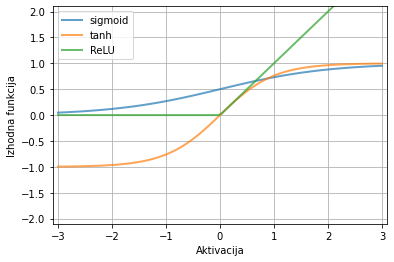

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

a = np.linspace(-3, 3, 100)
y_sigmoid = 1 / (1 + np.exp(-a))
y_tanh = (np.exp(2 * a) - 1) / (np.exp(2 * a) + 1)
y_relu = a.copy() 
y_relu[a < 0] = 0 
plt.plot(a, y_sigmoid, lw=2, alpha=0.7)
plt.plot(a, y_tanh, lw=2, alpha=0.7)
plt.plot(a, y_relu, lw=2, alpha=0.7)
plt.axis([-3.1, 3.1, -2.1, 2.1])
plt.grid(True)
plt.legend(["sigmoid", "tanh", "ReLU"])
plt.xlabel("Aktivacija")
plt.ylabel("Izhodna funkcija")

#### Aktivacijske funkcije v izhodnem sloju

Za nevrone v izhodnem sloju se običajno uporabljajo:

   - **sigmoidna funkcija**  za klasifikacijo,
   - **softmax funkcija** - za klasifikacijo z več izhodnimi razredi $J$:

$$
f(a_j) = \frac{e^{a_j}}{\sum_{j=0}^{J-1} e^{a_j}} \, ,
$$

kjer je $a_j$ aktivacija nevrona, ki ustreza razredu $j$; funkcija softmax normalizira vsoto izhodov vseh izhodnih nevronov, zato si jo lahko predstavljamo kot približek verjetnosti vsakega razreda $f(a_j) \approx P(y = j \mid \mathbf{a})$,

   - **linearna funkcij** - v regresijskih modelih

$$
f(a) = a
$$

## 12.2. Funkcija izgube

Izbira nelinearnosti v izhodnem sloju bo določila izbiro funkcije izgube mreže.
Nekatere funkcije izgub imajo ugodnejše lastnosti za nekatere izhodne nelinearnosti v primerjavi z drugimi.

Običajno se uporabljajo naslednje funkcije izgube:

   - **srednja kvadratna napaka** - osnovna funkcija napake za regresijo in binarno klasifikacijo,

$$
MSE = \frac{1}{N} \sum_{n=0}^{N-1} (y - \tilde{y})^2
$$

   - **križna entropija** - ima izpeljanko z boljšimi značilnostmi v klasifikacijskih modelih, pri katerih je izhodna nelinearnost sigmoida,

$$
CE = - \frac{1}{N} \sum_{n=0}^{N-1} y \ln \tilde{y} + (1-y) \ln(1-\tilde{y})
$$
   - **log-podobnost** - v modelih z izhodno funkcijo softmax.

$$
LL = - \ln \tilde{y}
$$

## 12.3. Učenje plitvih nevronskih mrež

Kot smo povedali v prejšnjem poglavju, nevronske mreže običajno učimo z algoritmom **gradientnega spuščanja (GD)**.

Kot je omenjeno v poglavju 11., se v plitvih in globokih nevronskih mrežah izračun gradienta za nastavitev parametrov $\theta$ začne z izračunom gradientov za izhodni sloj in se nato vrne skozi (vse) skrite plasti. 
Zaradi tega se ta postopek imenuje **sestopanje**.

\* Postopek sestopanje gradientov je bolj izrazit v globokih nevronskih mrežah, ki imajo več skritih slojev.

Za izračun delnega derivata glede na vsak parameter omrežja se uporablja **verižno pravilo** iz kalkulacije:
$$
   \frac{\partial \mathcal{L}}{\partial \theta_l} =
   \frac{\partial \mathcal{L}}{\partial \tilde{y}}
   \cdot \frac{\partial \tilde{y}}{\partial y_{L-2}}
   \, \cdots \, \frac{\partial y_{l+1}}{\partial \theta_{l+1}}
   \cdot \frac{\partial y_{l}}{\partial \theta_{l}}
   \, ,
$$

kjer je $y_l$ izhod $l$-tega sloja mreže, $L$ pa je skupno število slojev.

#### Inicializacija parametrov omrežja

Običajno se začetne vrednosti parametrov omrežja določijo naključno med njegovo inicializacijo. 
Zavedati se moramo, da bo natančna vrednost parametrov vplivala na proces učenja. 
Če torej predpostavimo, da je funkcija izgube $\mathcal{L}$ odvisna od parametra $\theta$, kot je prikazano na sliki 2, lahko vidimo, da bi bilo učenje omrežja hitrejše, če bi bila začetna vrednost $\theta$ bližje minimumu $\mathcal{L}$, npr. v položaju $\theta_B$ ali $\theta_C$ namesto $\theta_A$. 
Seveda ne vemo, kje je minimum $\mathcal{L}$, vendar je lahko koristno opraviti več postopkov učenja istega omrežja z različnimi začetnimi vrednostmi parametrov.

<img align="middle" alt="Gradient descend start positions" src="https://raw.githubusercontent.com/VALENCEML/eBOOK/main/EN/12/12_gradient_descend_start.png" width="600px" style="display:block; margin-left: auto; margin-right: auto;">

**Slika 2.** Izbira začetne vrednosti parametra $\theta$.

Problem izbire začetne točke je še večji, če je funkcija izgube $\mathcal{L}$ bolj kompleksno odvisna od parametra $\theta$, kot na sliki 3. Takrat je izbira začetne vrednosti $\theta$ lahko ključna za optimalno usposabljanje mreže. Izmed treh ponujenih začetnih vrednosti lahko le z vrednostjo $\theta_C$ dosežemo optimalno vrednost $\theta$, za katero ima $\mathcal{L}$ najmanjšo vrednost, imenovano **globalni minimum**, s pomočjo gradientnega spuščanja. Če začnemo z $\theta_B$ ali $\theta_A$, se bo postopek usposabljanja končal z vrednostmi $\theta$, za katere ima vrednost $\mathcal{L}$ **lokalni minimum**.

\* Upoštevajte, da je $\theta_B$ bližje globalnemu minimumu kot $\theta_C$!

<img align="middle" alt="Gradient descend global and local minimum" src="https://raw.githubusercontent.com/VALENCEML/eBOOK/main/EN/12/12_gradient_descend_start_global_local.png" width="600px" style="display:block; margin-left: auto; margin-right: auto;">

**Slika 3.** Primer začetnih vrednosti parametra $\theta$ s kompleksnejšo funkcijo izgube.

### Stopnja učenja

Pri uporabi GD je stopnja učenja eden najpomembnejših parametrov pri usposabljanju nevronske mreže.
Če je prevelik, lahko optimizacija zgreši minimum funkcije napake, če pa je premajhen, bo algoritem potreboval veliko iteracij, da dokonča usposabljanje.

<img align="middle" alt="Gradient descend large learning rate" src="https://raw.githubusercontent.com/VALENCEML/eBOOK/main/EN/12/12_gradient_descend_large_rate.png" width="600px" style="display:block; margin-left: auto; margin-right: auto;">

<img align="middle" alt="Gradient descend small learning rate"  src="https://raw.githubusercontent.com/VALENCEML/eBOOK/main/EN/12/12_gradient_descend_small_rate.png" width="600px" style="display:block; margin-left: auto; margin-right: auto;">

**Slika 4.** Ilustracija vpliva koraka učenja na postopek usposabljanja: če je korak velik, se bo omrežje hitro približalo minimumu funkcije izgube, vendar ga ne bo moglo doseči; če je korak majhen, lahko omrežje doseže minimum, vendar bo za usposabljanje potrebno večje število iteracij.

Za optimizacijo procesa učenja se običajno uporablja **razporeditev stopnje učenja**.

Ena od preprostih strategij je uporaba večje stopnje učenja na začetku učenja, ko omrežje ne ve ničesar o problemu, da bi hitreje napredovalo.
Nato se ta sprva velika stopnja postopoma zmanjša, da se lahko usposabljanje približa minimumu funkcije izgube.

Obstajajo tudi naprednejši algoritmi, kot je **Adam**, ki se pogosto uporablja pri usposabljanju nevronskih mrež. Pri prilagajanju koraka učenja upošteva prvi in drugi moment, tj. hitrost in pospešek spremembe gradienta glede na prejšnje iteracije.

Ena glavnih težav pri usposabljanju nevronskih mrež je možnost, da proces obtiči v lokalnem minimumu na račun izpuščanja globalnega minimuma.
To je bolj izrazito pri manjših nevronskih mrežah.
To težavo lahko rešimo tako, da po določenem številu iteracij učni korak ponovno inicializiramo na začetno veliko vrednost.

#### Razdelitev testne množice na serije

Pri učenju nevronskih mrež so nabori podatkov običajno veliki in jih ni mogoče shraniti v delovni pomnilnik, zato je treba med usposabljanjem podatke razdeliti na dele.

Ena skrajnost je optimizacija parametrov mreže z gradientom, izračunanim za vsakega od vzorcev iz učne množice posebej.
Ta različica algoritma GD se imenuje **stohastični gradientni spust**.
Prehod celotne učne množice se imenuje **epoh**.
Naključnost vhodnih vzorcev se izvede tako, da se pred vsakim epohom naključno premeša nabor podatkov, čemur sledi zaporedno vzorčenje.

Vendar izračun gradienta na vzorec ne zagotavlja dobre ocene pravega gradienta funkcije izgube.
Rešitev je, da se za izračun gradienta in posodobitev parametrov uporabi naključno izbrana podmnožica ali **skupina** vzorcev iz učne množice.
Ta različica algoritma GD se imenuje **sklopni gradientni spust (BGD)*** in **mini sklopni gradientni spust (MBGD)**.

\* Tehnično je med MBGD in BGD razlika - pri MBGD se parametri posodobijo za vsako serijo, pri BGD pa se to stori po prehodu skozi celotno učno množico.

Skoraj vedno se za učenje nevronskih mrež in drugih algoritmov strojnega učenja uporablja algoritem MBGD, vendar pod imenom SGD.

## 12.4. Regularizacija nevronskih mrež

Pri usposabljanju nevronskih mrež obstaja nevarnost, da se parametri nevronske mreže **preveč prilagodijo**.
To se zgodi, ko se omrežje preveč prilagodi na učno množico, zaradi česar se njegova učinkovitost na testni množici poslabša.
Zato je treba v postopku usposabljanja kaznovati pretirano prilagajanje.
To se imenuje **regularizacija**.

Ker pri pretiranem prilagajanju parametri omrežja dobijo izjemno visoke vrednosti, je eden od načinov za regularizacijo ta, da v funkcijo izgube vključimo izraz, ki to kaznuje.
To storimo tako, da uvedemo normo $L^2$ parametrov modela $\theta$.
Na primer, če kot primer uporabimo srednjo kvadratno napako, bi imeli:

$$
   L(y, \tilde{y}, \theta) = L(y, \tilde{y}) + \lambda \sum_{l=0}^{L-1} (\mathbf{W}_l^T \mathbf{W}_l + \mathbf{b}_l^T \mathbf{b}_l) \, ,
$$

kjer je $\lambda$ **koeficient regulacije**, $\mathbf{W}_l^T \mathbf{W}_l$ in $\mathbf{b}_l^T \mathbf{b}_l$ pa sta vsote vseh kvadratov parametrov nevronov plasti $l$.

## 12.3. Regresija s plitko nevronsko mrežo

Izdelajmo nevronsko mrežo za napovedovanje izhoda sinusne funkcije za vhodne podatke, ki niso del učnega niza.
Za delo z nevronskimi mrežami bomo uporabljali paket `scikit-learn`.

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn import neural_network

Najprej ustvarimo učno množico.
Vzamemo 10 enakomerno razporejenih vrednosti v intervalu od 0 do 2$\pi$ in zanje izračunamo sinusno vrednost.
Poleg sinusne funkcije bomo dodali še beli šum.

In [ ]:
xs = np.linspace(0, 2 * np.pi, 10)
np.random.seed(42)
ys = np.sin(xs) + np.random.normal(size=xs.size) * 0.2

Pokažimo nastali učni niz in sinusno funkcijo, ki bo predstavljala ciljno funkcijo, ki se je želimo naučiti.

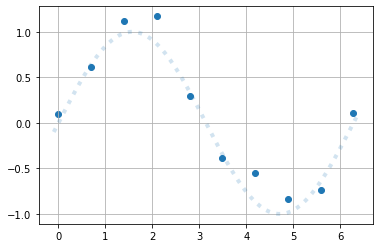

In [ ]:
x_axis = np.linspace(-.1, 2 * np.pi + .1, 100)
y_sin = np.sin(x_axis)

xs = np.expand_dims(xs, 1)
x_axis = np.expand_dims(x_axis, 1)

plt.figure()
plt.scatter(xs, ys)
plt.plot(x_axis, y_sin, ':', lw=4, alpha=0.2)
plt.grid()

Inicializirajmo nevronsko mrežo z razredom `MLPRegressor`, ki bo ustvaril nevronsko mrežo z linearno izhodno funkcijo v nevronu izhodne plasti.

In [ ]:
reg = neural_network.MLPRegressor(
    hidden_layer_sizes=(5),
    activation="tanh",
    solver="adam",
    alpha=0.0001,
    batch_size="auto",
    learning_rate_init=0.01,
    max_iter=50,
    tol=1e-4,
    early_stopping=False,
    random_state=42,
    verbose=True,    
    )

Z vhodnimi parametri določimo naslednje vrednosti:
- `hidden_layer_sizes` - število nevronov v skritem sloju mreže,
- `activation` - izbira nelinearnosti izhoda nevronov v skritem sloju mreže,
- `solver` - izbira učnega algoritma
- `alpha` - koeficient regularizacije $L^2$, ki smo ga zgoraj označili z $\lambda$,
- `batch_size` - velikost serije,
- `learning_rate_init` - začetna vrednost stopnje učenja
- `max_iter` - največje število epoh učenja omrežja,
- `tol` - če se izguba v 10 epohah spremeni manj, kot je ta tolerančni prag, se učenje ustavi, čeprav največje število epoh še ni doseženo,
- `early_stopping` - parameter, ki omogoča zgodnjo prekinitev usposabljanja, če začnejo naraščati izgube, izračunane na podmnožici za preverjanje, ki se samodejno naključno loči od učne množice,
- `random_state` - nastavitev generatorja naključnih števil, da se med naključno inicializacijo pridobijo enaki parametri omrežja,
- `verbose` - stopnja podrobnosti, ki se izpiše v postopku usposabljanja omrežja.

Vsi ti argumenti, ki opisujejo arhitekturo omrežja in nadzorujejo postopek usposabljanja, so znani kot **hiperparametri** in se razlikujejo od dejanskih **parametrov** nevronov v omrežju - slednji se v postopku učenja posodabljajo, prvi pa ne.

Če si želimo ogledati vse razpoložljive nastavitve nevronske mreže in več podrobnosti o vsaki od njih, lahko vnesemo `neural_network.MLPRegressor?`

Ko smo omrežje inicializirali, ga lahko treniramo z naslednjim ukazom:

In [ ]:
reg.fit(xs, ys)

Iteration 1, loss = 1.79730213
Iteration 2, loss = 1.69205954
Iteration 3, loss = 1.59169986
Iteration 4, loss = 1.49621502
Iteration 5, loss = 1.40556850
Iteration 6, loss = 1.31969700
Iteration 7, loss = 1.23851098
Iteration 8, loss = 1.16189426
Iteration 9, loss = 1.08970298
Iteration 10, loss = 1.02176477
Iteration 11, loss = 0.95787993
Iteration 12, loss = 0.89782678
Iteration 13, loss = 0.84137310
Iteration 14, loss = 0.78829203
Iteration 15, loss = 0.73837773
Iteration 16, loss = 0.69145581
Iteration 17, loss = 0.64738671
Iteration 18, loss = 0.60606433
Iteration 19, loss = 0.56741246
Iteration 20, loss = 0.53138080
Iteration 21, loss = 0.49794070
Iteration 22, loss = 0.46707996
Iteration 23, loss = 0.43879543
Iteration 24, loss = 0.41308237
Iteration 25, loss = 0.38992005
Iteration 26, loss = 0.36925447
Iteration 27, loss = 0.35098048
Iteration 28, loss = 0.33492811
Iteration 29, loss = 0.32085881
Iteration 30, loss = 0.30847557
Iteration 31, loss = 0.29744608
Iteration 32, los

C:\Users\ziga\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor(activation='tanh', hidden_layer_sizes=5, learning_rate_init=0.01,
             max_iter=50, random_state=42, verbose=True)

Iz izpisa je razvidno, da usposabljanje ni konvergiralo, kar pomeni, da se je izguba še vedno zmanjševala, preden se je učenje ustavilo zaradi doseganja največjega števila epoh. Z drugimi besedami, naše omrežje je **neprilagojeno**.

Zdaj lahko uporabimo naučeno mrežo za napovedovanje vrednosti naučene funkcije:

In [ ]:
y_pred_under = reg.predict(x_axis)

In prikažemo rezultate:

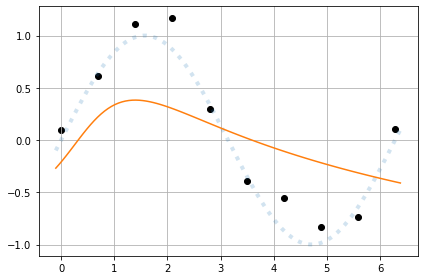

In [ ]:
# %% plot results
plt.figure()
plt.scatter(xs, ys, c='k')
plt.plot(x_axis, y_sin, ':', lw=4, alpha=0.2)
plt.plot(x_axis, y_pred_under)
plt.grid()
plt.tight_layout()

Vidimo, da jemreža razmeroma dobro opisala točke učne množice, vendar se ni naučila ciljne funkcije.

Da bi omrežje ponovno usposobili, ga bomo inicializirali z novimi parametri in ponovno izvedli učenje.

In [ ]:
reg = neural_network.MLPRegressor(
    hidden_layer_sizes=(5),
    activation="tanh",
    alpha=0.0001,
    learning_rate_init=0.01,
    max_iter=500,
    tol=1e-4,
    random_state=42,
    )
reg.fit(xs, ys)

MLPRegressor(activation='tanh', hidden_layer_sizes=5, learning_rate_init=0.01,
             max_iter=500, random_state=42)

Vidimo, da se je učenje zdaj končalo. Prikažimo rezultate.

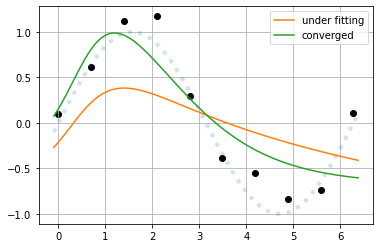

In [ ]:
y_pred = reg.predict(x_axis)

plt.figure()
plt.scatter(xs, ys, c='k')
plt.plot(x_axis, y_sin, ':', lw=4, alpha=0.2)
plt.plot(x_axis, y_pred_under, label="under fitting")
plt.plot(x_axis, y_pred, label="converged")
plt.grid()
plt.legend()

Vidimo, da se je omrežje po konvergenci približalo ciljni funkciji.

Prikažimo parametre treniranega omrežja:
- zadnjo vrednost izgube,
- število epoh pri usposabljanju,
- uteži nevronov v omrežju in
- pristranskosti nevronov v omrežju.

In [ ]:
print("loss", reg.loss_)
print("epochs", reg.n_iter_)
print("weights", reg.coefs_)
print("biases", reg.intercepts_)

loss 0.05925160789377685
epochs 274
weights [array([[ 0.45417082,  1.30731649,  0.57117395,  0.35249836, -1.01839051]]), array([[-0.82887394],
       [ 0.79547048],
       [ 0.51462409],
       [-0.86270602],
       [-0.46653341]])]
biases [array([-0.92192804, -0.58288423,  1.25031575, -0.38712043,  0.04991098]), array([-0.7600417])]


Vidimo, da se je učenje končalo v 274 epohah, končna vrednost izgube pa je bila 0,059. To je manj kot zadnja izguba, ko smo učenje ustavili v 50. epohu (0,14).

Izdelajmo tudi graf spremembe izgube med učenjem.

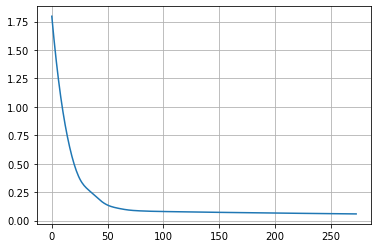

In [ ]:
plt.plot(reg.loss_curve_)
plt.grid()

Videli smo že, kako je sprememba enega od hiperparametrov (največje število epoh) vplivala na postopek učenje.

Izvedimo nekaj poskusov, da vidimo, kako preostali hiperparametri vplivajo na delovanje dobljene mreže.

### Poskus 1. Spreminjanje števila nevronov

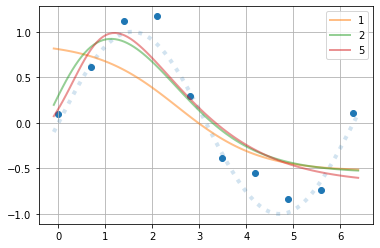

In [ ]:
plt.figure()
plt.scatter(xs, ys)
plt.plot(x_axis, y_sin, ':', lw=4, alpha=0.2)
plt.grid()
for neurons in [1, 2, 5]:
    reg = neural_network.MLPRegressor(
        hidden_layer_sizes=neurons,
        activation="tanh",
        alpha=0.0001,
        learning_rate_init=0.01,
        max_iter=500,
        tol=1e-4,
        random_state=42,
        )
    reg.fit(xs, ys)
    y_preds = reg.predict(x_axis)
    plt.plot(x_axis, y_preds, lw=2, alpha=0.5, label=neurons)

plt.legend()

Vidimo, da z 1 nevronom v skritem sloju na izhodu mreže dobimo njeno izhodno nelinearno funkcijo `tanh`. Že z dvema nevronoma se lahko omrežje nauči funkcije, ki je blizu ciljne. To ponazarja, da mora biti sposobnost modela primerna problemu, ki ga želimo rešiti.

### Poskus 2. Spreminjanje hitrosti učenja

C:\Users\ziga\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


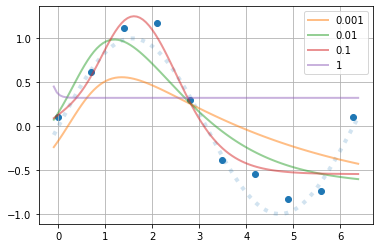

In [ ]:
# %% poskusi različne stopnje učenja
plt.figure()
plt.scatter(xs, ys)
plt.plot(x_axis, y_sin, ':', lw=4, alpha=0.2)
plt.grid()
for learn in [0.001, 0.01, 0.1, 1]:
    reg = neural_network.MLPRegressor(
        hidden_layer_sizes=(5),
        activation="tanh",
        alpha=0.0001,
        learning_rate_init=learn,
        max_iter=500,
        tol=1e-4,
        random_state=42,
        )
    reg.fit(xs, ys)
    y_preds = reg.predict(x_axis)
    plt.plot(x_axis, y_preds, lw=2, alpha=0.5, label=learn)

plt.legend()

Iz grafa je jasno razviden vpliv stopnje učenja na proces učenja. Pri zelo velikih vrednostih (1) lahko vidimo, da je učenje popolnoma neuspešno. Pri vrednostih 0,1 in 0,01 so rezultati boljši. Pri majhnih vrednostih (0,001) vidimo, da učenje ni konvergiralo v enakem številu epoh kot pri večjih vrednostih.

### Poskus 3. Spreminjanje začetne faze učenja

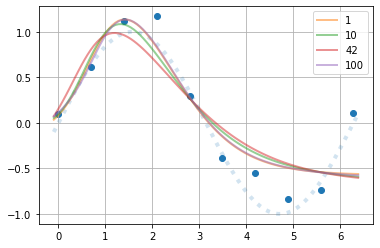

In [ ]:
# %% poskusi različne začetne točke
plt.figure()
plt.scatter(xs, ys)
plt.plot(x_axis, y_sin, ':', lw=4, alpha=0.2)
plt.grid()
for seed in [1, 10, 42, 100]:
    reg = neural_network.MLPRegressor(
        hidden_layer_sizes=(5),
        activation="tanh",
        alpha=0.0001,
        learning_rate_init=0.01,
        max_iter=500,
        tol=1e-4,
        random_state=seed,
        )
    reg.fit(xs, ys)
    y_preds = reg.predict(x_axis)
    plt.plot(x_axis, y_preds, lw=2, alpha=0.5, label=seed)

plt.legend()

Vidimo, da začetna točka dejansko vpliva na končni rezultat postopka učenja.

### Poskus 4. Regularizacija

Za ponazoritev potrebe po regularizaciji omrežja poglejmo, kaj se zgodi, če zmanjšamo toleranco ustavljanja in povečamo največje število epoh.

In [ ]:
reg = neural_network.MLPRegressor(
    hidden_layer_sizes=(5),
    activation="tanh",
    alpha=0.0001,
    learning_rate_init=0.01,
    max_iter=5000,
    tol=1e-9,
    random_state=42,
    )
reg.fit(xs, ys)

MLPRegressor(activation='tanh', hidden_layer_sizes=5, learning_rate_init=0.01,
             max_iter=5000, random_state=42, tol=1e-09)

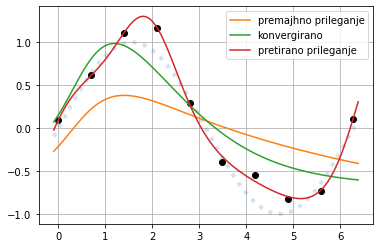

In [ ]:
y_pred_over = reg.predict(x_axis)

plt.figure()
plt.scatter(xs, ys, c='k')
plt.plot(x_axis, y_sin, ':', lw=4, alpha=0.2)
plt.plot(x_axis, y_pred_under, label="premajhno prileganje")
plt.plot(x_axis, y_pred, label="konvergirano")
plt.plot(x_axis, y_pred_over, label="pretirano prileganje")
plt.grid()
plt.legend()

Vidimo lahko, da se je mreža odlično naučila nabora za učenje. Temu pravimo **pretirano prileganje**. To je seveda nezaželen rezultat, saj želimo, da bi omrežje lahko dobro delovalo tudi na podatkih, ki niso del učne množice.

Sklepamo lahko, da je višja vrednost `tol` ustavila učenje, preden so bili parametri omrežja ponovno nastavljeni. Dejansko je povzročila **predčasno zaustavitev**, kar je druga strategija za regularizacijo.

Poglejmo, kakšen vpliv bo imela regularizacija na postopek učenja.

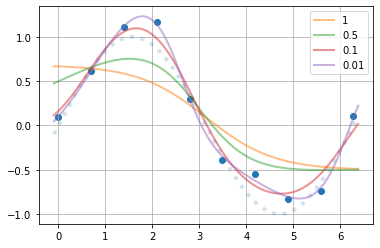

In [ ]:
# %% spreminjaj regularizacijo
plt.figure()
plt.scatter(xs, ys)
plt.plot(x_axis, y_sin, ':', lw=4, alpha=0.2)
plt.grid()
for alpha in [1, 0.5, 0.1, 0.01]:
    reg = neural_network.MLPRegressor(
        hidden_layer_sizes=(5),
        activation="tanh",
        alpha=alpha,
        learning_rate_init=0.01,
        max_iter=10000,
        tol=1e-9,
        random_state=42,
        )
    reg.fit(xs, ys)
    y_preds = reg.predict(x_axis)
    plt.plot(x_axis, y_preds, lw=2, alpha=0.5, label=alpha)

plt.legend()

Vidimo lahko učinek prevelike regularizacije. V primeru, ko je $\lambda$ 1, se mreža sploh ne uči iz učne množice. Pri premajhnih vrednostih (0,01) se omrežje spet pretirano prilega. Pri vrednosti 0,1 dobimo najboljše rezultate ne le v tem poskusu, temveč tudi na splošno - za vse poskuse do zdaj.